# Analysis and clustring of my spotify favorite songs

This notebook is continuation of XXX in which I covered:
1. Data gathering
2. Data preparation and exploratory analysis of my streaming history.
3. Spotify API: Adjsuting class written by XXXX. Adding extra methods for my case.

As a result from previous section I have got final data frame, which contains my songs streaming more than 5 times during last year with their audio features (dancability, lodness,..).

In this section I will focus on clustering. 
4. K-Means clustering. Finding accurate numer of clusters using elbow method.
5. Cluster visualisation using TSNE.

In [22]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('my_top_with_features.csv', index_col=0)

In [3]:
df.columns

Index(['index', 'endTime', 'artistName', 'trackName', 'msPlayed', 'counts',
       'trackID', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [4]:
df.head()

,index,endTime,artistName,trackName,msPlayed,counts,trackID,danceability,energy,key,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,2020-06-30 10:13,Don Diablo,Bad,3349,20,1T4U8Q2DRfs6OUg8DEsRZf,0.791,0.738,0.0,...,0.1590,0.666,123.927,audio_features,1T4U8Q2DRfs6OUg8DEsRZf,spotify:track:1T4U8Q2DRfs6OUg8DEsRZf,https://api.spotify.com/v1/tracks/1T4U8Q2DRfs6...,https://api.spotify.com/v1/audio-analysis/1T4U...,169911.0,4.0
1,5,2020-06-30 10:41,Vicetone,Astronomia,194816,23,3hWfKBt3n7j1xqIy6LA5ve,0.653,0.945,5.0,...,0.4390,0.326,126.093,audio_features,3hWfKBt3n7j1xqIy6LA5ve,spotify:track:3hWfKBt3n7j1xqIy6LA5ve,https://api.spotify.com/v1/tracks/3hWfKBt3n7j1...,https://api.spotify.com/v1/audio-analysis/3hWf...,198095.0,4.0
2,6,2020-06-30 14:56,Xxanaxx,Nie znajdziesz mnie (feat. TEN TYP MES),231765,9,3MpP7wlzhZRFNL3OelqBdK,0.656,0.660,10.0,...,0.1080,0.551,127.047,audio_features,3MpP7wlzhZRFNL3OelqBdK,spotify:track:3MpP7wlzhZRFNL3OelqBdK,https://api.spotify.com/v1/tracks/3MpP7wlzhZRF...,https://api.spotify.com/v1/audio-analysis/3MpP...,234336.0,4.0
3,11,2020-07-01 17:48,MEDUZA,Lose Control,144362,50,7CHi4DtfK4heMlQaudCuHK,0.598,0.526,10.0,...,0.1400,0.529,123.935,audio_features,7CHi4DtfK4heMlQaudCuHK,spotify:track:7CHi4DtfK4heMlQaudCuHK,https://api.spotify.com/v1/tracks/7CHi4DtfK4he...,https://api.spotify.com/v1/audio-analysis/7CHi...,168387.0,4.0
4,13,2020-07-01 17:50,Ed Sheeran,Beautiful People (feat. Khalid),10112,9,4evmHXcjt3bTUHD1cvny97,0.640,0.648,5.0,...,0.0802,0.548,92.977,audio_features,4evmHXcjt3bTUHD1cvny97,spotify:track:4evmHXcjt3bTUHD1cvny97,https://api.spotify.com/v1/tracks/4evmHXcjt3bT...,https://api.spotify.com/v1/audio-analysis/4evm...,197867.0,4.0


In [5]:
df = df[['artistName', 'trackName', 'counts',
        'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']]

In [14]:
df.shape

(1118, 14)

In [6]:
df.isnull().sum()

artistName          0
trackName           0
counts              0
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
dtype: int64

In [7]:
df.dropna(inplace=True)

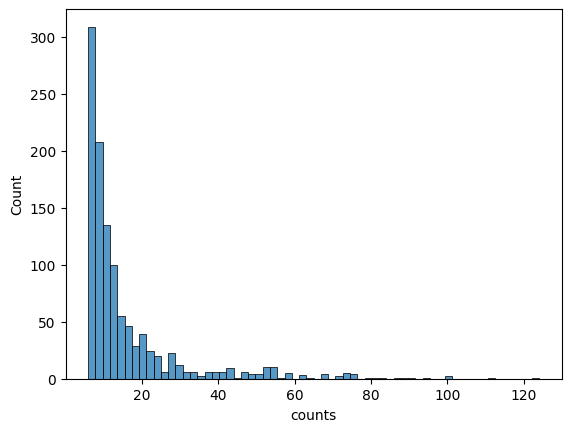

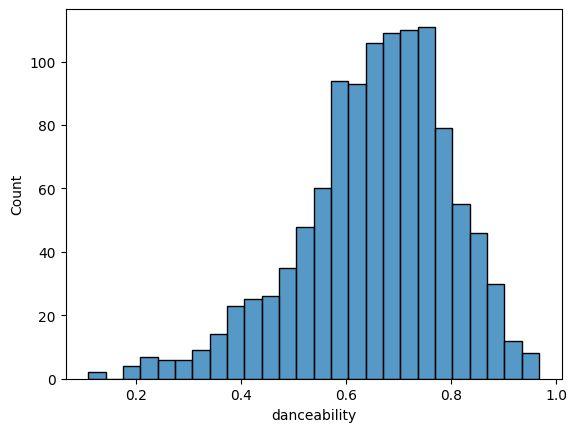

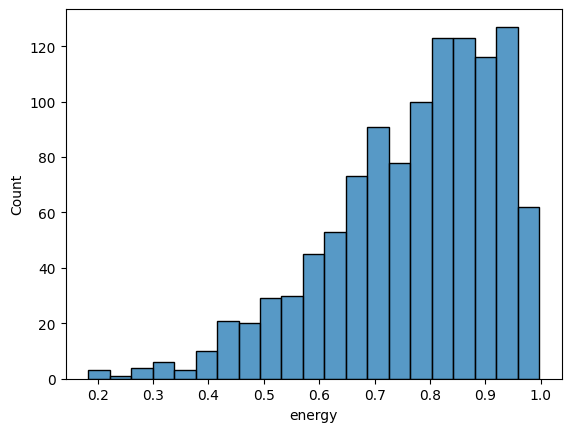

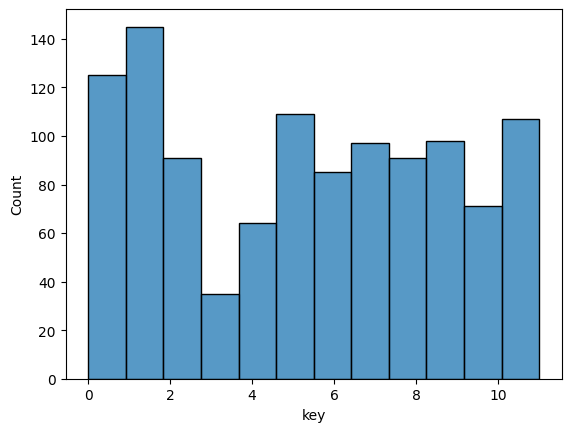

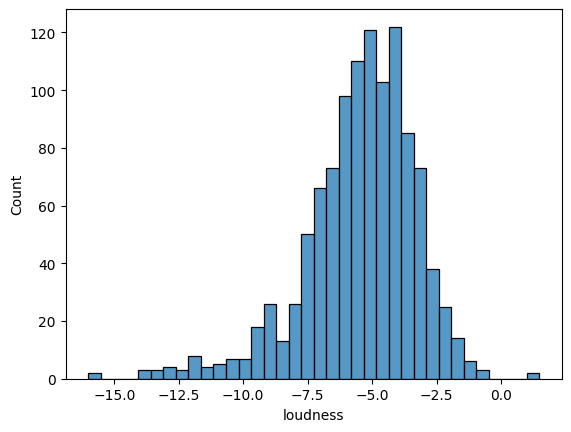

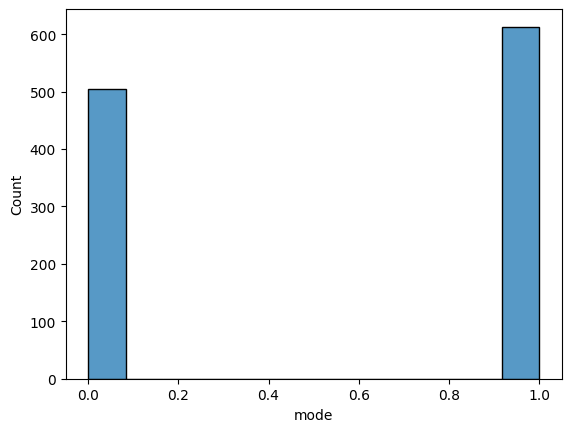

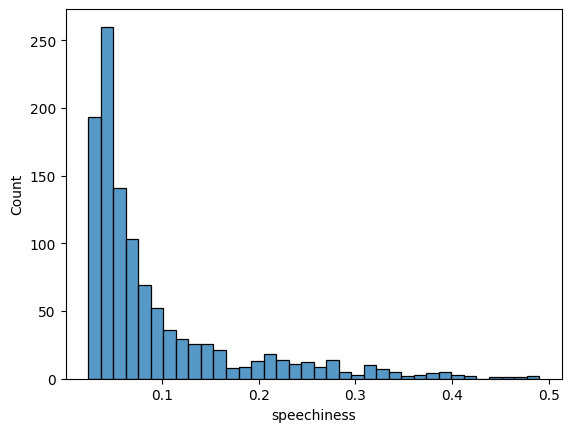

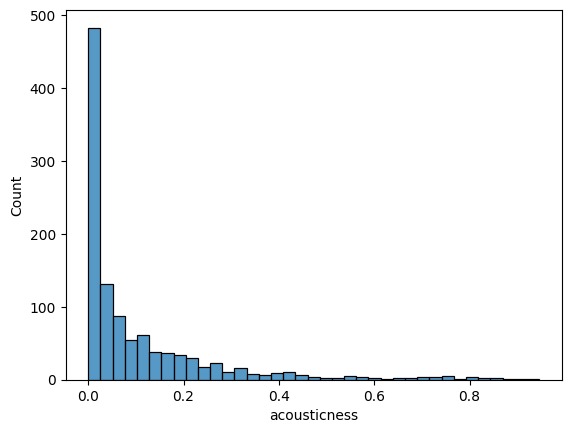

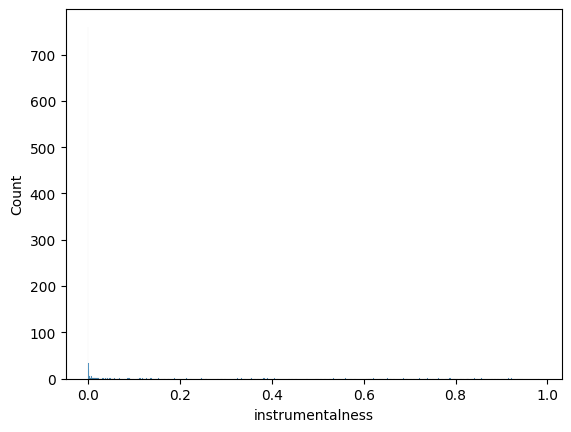

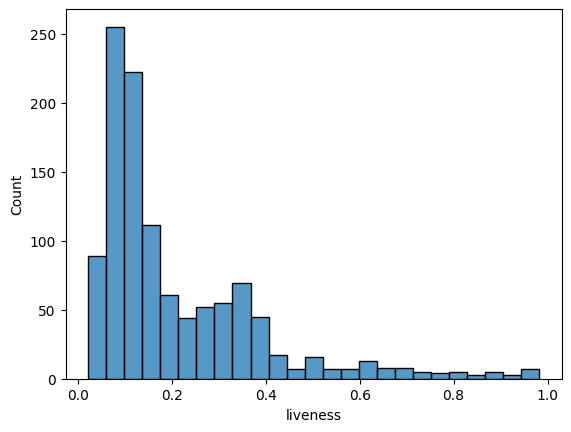

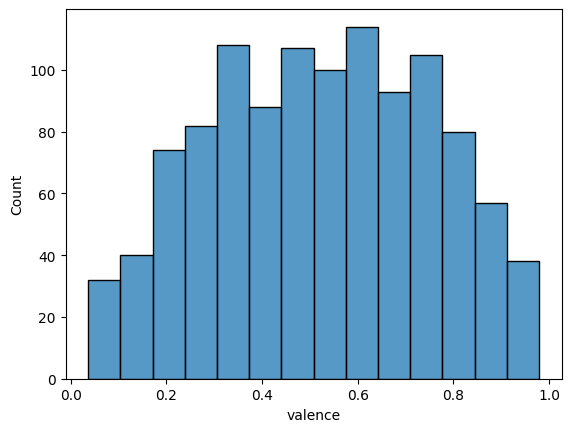

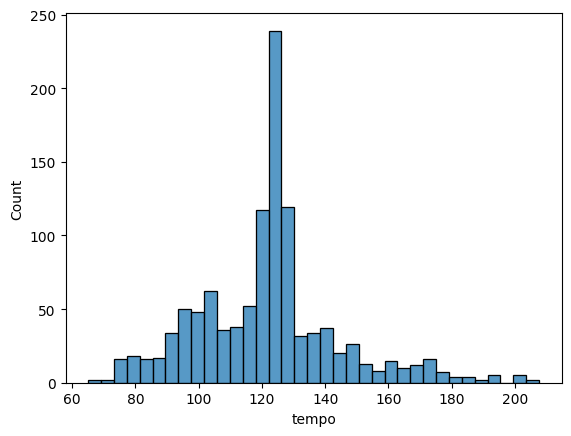

In [8]:
for i in df.describe().columns:
    sns.histplot(data=df, x=i)
    plt.show()

In [9]:
(df.artistName.value_counts()).to_frame().reset_index()

,index,artistName
0,Muse,50
1,JAY-Z,27
2,Oliver Heldens,20
3,Coldplay,19
4,Post Malone,19
...,...,...
492,The Kooks,1
493,The Black Keys,1
494,Kings of Leon,1
495,Royal Blood,1


<AxesSubplot:xlabel='danceability', ylabel='tempo'>

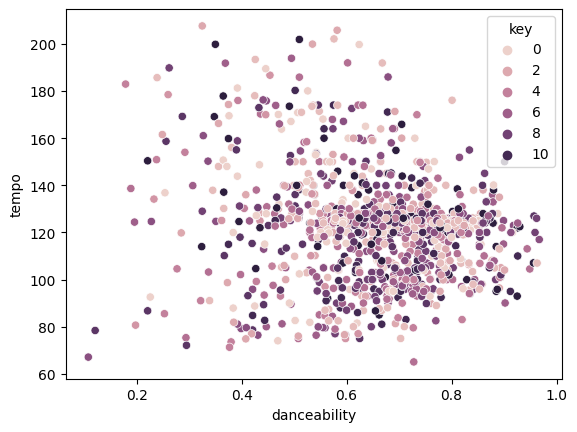

In [10]:
sns.scatterplot(data=df, x='danceability', y='tempo', hue='key')

In [12]:
X = df[['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']]

In [13]:
X = df[['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'tempo']]

In [15]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [16]:
# Create k-mean object
clt = KMeans(n_clusters=7, n_init=100)

# Train model
model = clt.fit(X_std)

In [17]:
labels = pd.Series(model.labels_)

In [18]:
labels.unique()

array([1, 4, 0, 2, 6, 3, 5])

In [19]:
df['labels'] = pd.Series(model.labels_)

In [20]:
inertions = []
num_clusters = range(2, 12)

# Populating distortions for various clusters
for i in num_clusters:
    clt = KMeans(n_clusters=i, n_init=100)
    model = clt.fit(X_std)
    inertions.append(model.inertia_)

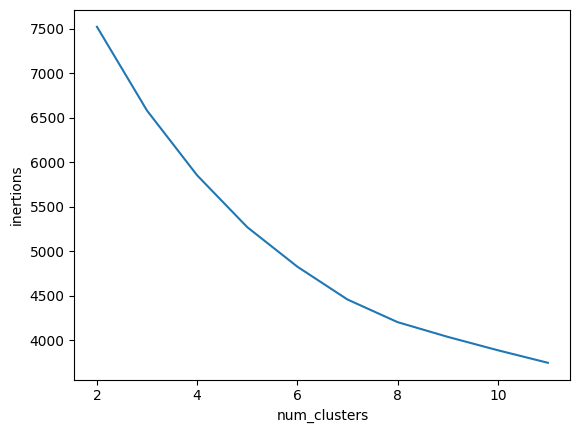

In [21]:
# Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
'inertions': inertions})
sns.lineplot(x='num_clusters', y='inertions',
data = elbow_plot_data)
plt.show()

In [23]:
tsne = TSNE(n_components=2, perplexity=20)

In [24]:
data_2d = tsne.fit_transform(X_std)

C:\Users\agata\OneDrive\Pulpit\Github\My_spotify_songs\spotify\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\agata\OneDrive\Pulpit\Github\My_spotify_songs\spotify\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [25]:
# colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'pink', 'orange', 'purple']
colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

C:\Users\agata\OneDrive\Pulpit\Github\My_spotify_songs\spotify\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


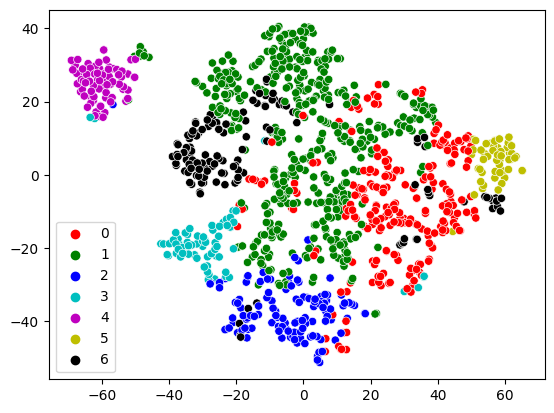

In [26]:
sns.scatterplot(data_2d[:,0], data_2d[:,1], hue=labels, palette=colours)
plt.show()